ECSE 415 assignment 1 

Student name: Tianyi Zou

Student ID: 260724913

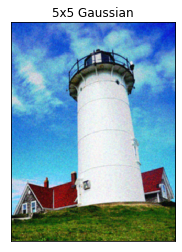

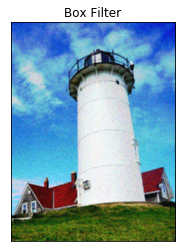

psnr of original image is 361.20199909921956 dB
psnr of gaussian filter is 25.52830689282689 dB
psnr of box filter is 24.888900237114374 dB
A high PSNR would signify a greater image quality. Since PSNR of gaussian filter is greater than that of box filter, gaussian filter gives a superior filtering result


In [1]:
import cv2
import math

import numpy as np
import matplotlib.pyplot as plt
#Denoising 
#2.1
image_path = "gaussian_lighthouse.png" 
img = cv2.imread(image_path)
image_path = "lighthouse.png" 
img_original = cv2.imread(image_path)

res1 = cv2.GaussianBlur(img, (5,5), sigmaX = 2, sigmaY = 2)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
res1 = cv2.cvtColor(res1, cv2.COLOR_BGR2RGB)
img_original = cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 10))
plt.subplot(131), plt.imshow(res1)
plt.title("5x5 Gaussian"), plt.xticks([]), plt.yticks([])


plt.show()


#2.2
#BOX filter
kernel = np.ones((5,5), np.float32)/(5*5)

res2 = cv2.filter2D(img, -1, kernel)
#res2=cv2.blur(img,(5,5))  similar results using cv2.blur()
plt.figure(figsize=(10, 10))
plt.subplot(131), plt.imshow(res2)
plt.title("Box Filter"), plt.xticks([]), plt.yticks([])
plt.show()

#2.3
psnr_original=cv2.PSNR(img_original, img_original)
psnr_gaussian=cv2.PSNR(img_original,res1)
psnr_box=cv2.PSNR(img_original,res2)
print("psnr of original image is",psnr_original,"dB")
print("psnr of gaussian filter is",psnr_gaussian,"dB")
print("psnr of box filter is",psnr_box,"dB")
print("A high PSNR would signify a greater image quality. Since PSNR of gaussian filter is greater than that of box filter, gaussian filter gives a superior filtering result")

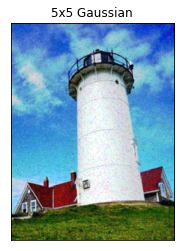

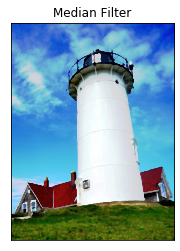

psnr of original image is 361.20199909921956 dB
psnr of gaussian filter is 24.77803763132235 dB
psnr of median filter is 26.843612368248806 dB
A high PSNR would signify a greater image quality. Since PSNR of median filter is greater than that of gaussian filter, median filter gives a superior filtering result


In [190]:
#2.4
image_path = "saltandpepper_lighthouse.png" # use your own image path
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
image_path = "lighthouse.png" 
img_original = cv2.imread(image_path)
img_original = cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB)
#Gaussian filter
res3 = cv2.GaussianBlur(img, (5,5), sigmaX = 2, sigmaY = 2)

plt.imshow(res3)
plt.title("5x5 Gaussian"), plt.xticks([]), plt.yticks([])
plt.show()

#2.5
# 5x5 Median filter
res4 = cv2.medianBlur(img, 5)
plt.imshow(res4)
plt.title("Median Filter"), plt.xticks([]), plt.yticks([])
plt.show()

#2.6
psnr_original=cv2.PSNR(img, img)
psnr_gaussian=cv2.PSNR(res3, img_original)
psnr_box=cv2.PSNR(res4,img_original)
print("psnr of original image is",psnr_original,"dB")
print("psnr of gaussian filter is",psnr_gaussian,"dB")
print("psnr of median filter is",psnr_box,"dB")
print("A high PSNR would signify a greater image quality. Since PSNR of median filter is greater than that of gaussian filter, median filter gives a superior filtering result")

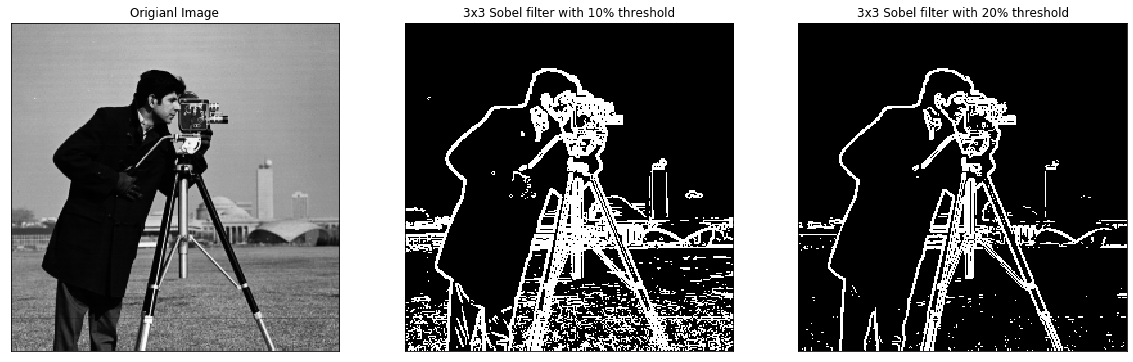

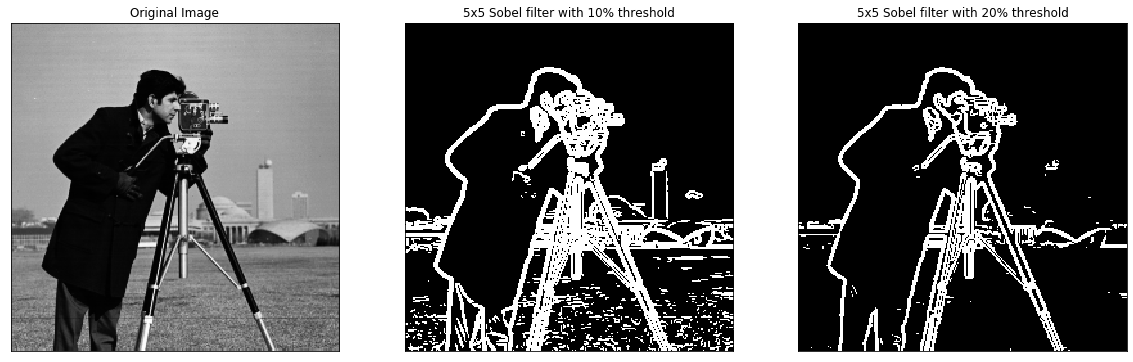

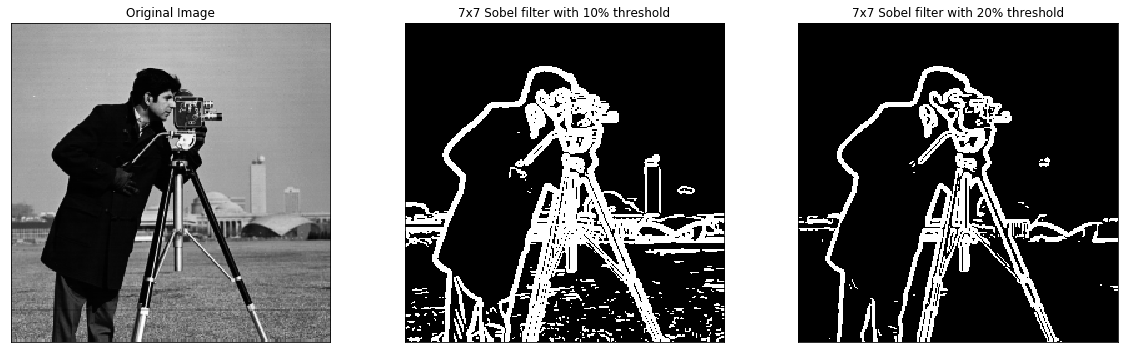

In [191]:
#3.1
image_path = "cameraman.png" 
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
#get the 10% and 20% of maximum pixel value in the filtered image


# apply 3x3 Sobel filters to the intensity channel
I_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
I_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
I_m = cv2.magnitude(I_x, I_y)
max_pixel = np.amax(I_m)
small_thresh = 0.1*max_pixel
big_thresh = 0.2*max_pixel
ret, img_thresh_small = cv2.threshold(I_m, small_thresh, max_pixel, cv2.THRESH_BINARY)
ret, img_thresh_big = cv2.threshold(I_m, big_thresh, max_pixel, cv2.THRESH_BINARY)


# display images
plt.figure(figsize=(20, 20))
plt.subplot(131), plt.imshow(img, cmap="gray")
plt.title("Origianl Image"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(img_thresh_small, cmap="gray")
plt.title("3x3 Sobel filter with 10% threshold"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(img_thresh_big, cmap="gray")
plt.title("3x3 Sobel filter with 20% threshold"), plt.xticks([]), plt.yticks([])




# apply 5x5 Sobel filters to the intensity channel
I_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
I_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)
I_m = cv2.magnitude(I_x, I_y)
max_pixel = np.amax(I_m)
small_thresh = 0.1*max_pixel
big_thresh = 0.2*max_pixel

ret, img_thresh_small = cv2.threshold(I_m, small_thresh, max_pixel, cv2.THRESH_BINARY)
ret, img_thresh_big = cv2.threshold(I_m, big_thresh, max_pixel, cv2.THRESH_BINARY)


# display images
plt.figure(figsize=(20, 20))
plt.subplot(231), plt.imshow(img, cmap="gray")
plt.title("Original Image"), plt.xticks([]), plt.yticks([])
plt.subplot(232), plt.imshow(img_thresh_small, cmap="gray")
plt.title("5x5 Sobel filter with 10% threshold"), plt.xticks([]), plt.yticks([])
plt.subplot(233), plt.imshow(img_thresh_big, cmap="gray")
plt.title("5x5 Sobel filter with 20% threshold"), plt.xticks([]), plt.yticks([])


# apply 7x7 Sobel filters to the intensity channel
I_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=7)
I_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=7)
I_m = cv2.magnitude(I_x, I_y)

max_pixel = np.amax(I_m)
small_thresh = 0.1*max_pixel
big_thresh = 0.2*max_pixel
ret, img_thresh_small = cv2.threshold(I_m, small_thresh, max_pixel, cv2.THRESH_BINARY)
ret, img_thresh_big = cv2.threshold(I_m, big_thresh, max_pixel, cv2.THRESH_BINARY)


# display images
plt.figure(figsize=(20, 20))
plt.subplot(331), plt.imshow(img, cmap="gray")
plt.title("Original Image"), plt.xticks([]), plt.yticks([])
plt.subplot(332), plt.imshow(img_thresh_small, cmap="gray")
plt.title("7x7 Sobel filter with 10% threshold"), plt.xticks([]), plt.yticks([])
plt.subplot(333), plt.imshow(img_thresh_big, cmap="gray")
plt.title("7x7 Sobel filter with 20% threshold"), plt.xticks([]), plt.yticks([])

plt.show()



3.2 Comment on the effect of filter size on the output

A larger size (7x7) kernel can overlook at the features and could skip the essential details in the images whereas a smaller size (3x3) kernel could provide more information leading to more confusion. 

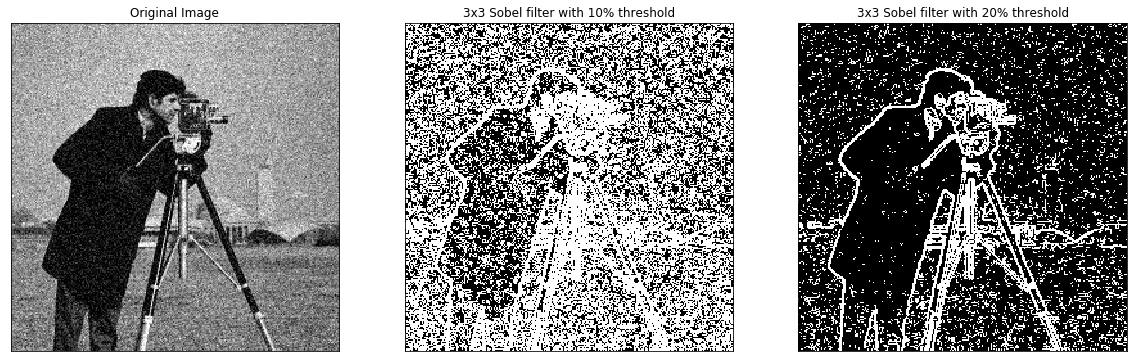

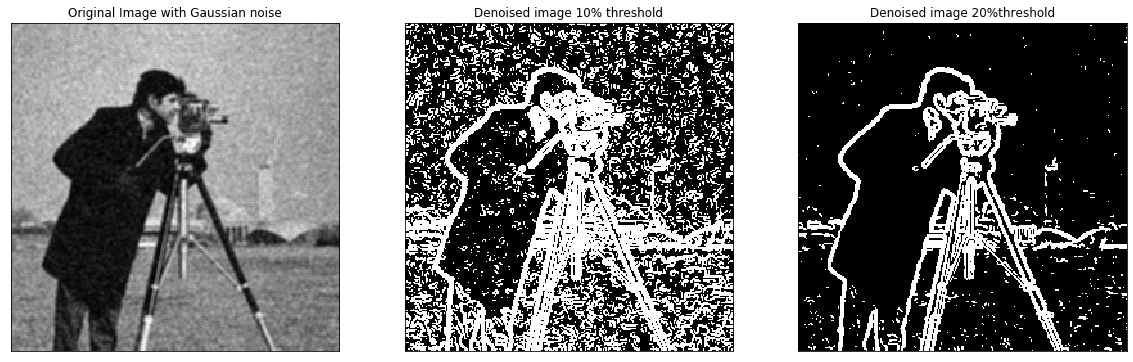

In [192]:
#3.3
image_path = "gaussian_cameraman.png" 
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)


# apply 3x3 Sobel filters to the intensity channel
I_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
I_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
I_m = cv2.magnitude(I_x, I_y)
max_pixel = np.amax(I_m)
small_thresh = 0.1*max_pixel
big_thresh = 0.2*max_pixel
ret, img_thresh_small = cv2.threshold(I_m, small_thresh, max_pixel, cv2.THRESH_BINARY)
ret, img_thresh_big = cv2.threshold(I_m, big_thresh, max_pixel, cv2.THRESH_BINARY)


# display images
plt.figure(figsize=(20, 20))
plt.subplot(131), plt.imshow(img, cmap="gray")
plt.title("Original Image"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(img_thresh_small, cmap="gray")
plt.title("3x3 Sobel filter with 10% threshold"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(img_thresh_big, cmap="gray")
plt.title("3x3 Sobel filter with 20% threshold"), plt.xticks([]), plt.yticks([])
plt.show()


3.4
#3x3 box filter 
kernel = np.ones((3,3), np.float32)/(3*3) 
img_box = cv2.filter2D(img, -1, kernel)



I_x = cv2.Sobel(img_box, cv2.CV_64F, 1, 0, ksize=3)
I_y = cv2.Sobel(img_box, cv2.CV_64F, 0, 1, ksize=3)
I_m = cv2.magnitude(I_x, I_y)

max_pixel = np.amax(I_m)
small_thresh = 0.1*max_pixel
big_thresh = 0.2*max_pixel
ret, img_thresh_small = cv2.threshold(I_m, small_thresh, max_pixel, cv2.THRESH_BINARY)
ret, img_thresh_big = cv2.threshold(I_m, big_thresh, max_pixel, cv2.THRESH_BINARY)


# display images
plt.figure(figsize=(20, 20))
plt.subplot(131), plt.imshow(img_box, cmap="gray")
plt.title("Original Image with Gaussian noise"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(img_thresh_small, cmap="gray")
plt.title("Denoised image 10% threshold"), plt.xticks([]), plt.yticks([])

plt.subplot(133), plt.imshow(img_thresh_big, cmap="gray")
plt.title("Denoised image 20%threshold"), plt.xticks([]), plt.yticks([])

plt.show()


3.5 Comment on the effectiveness of using denoising prior to edge detection.

Denoising helps the edge detection. Noise interacts with the Sobel filter in such a way that a bright pixel caused by noise can be detected as an edge. Before appling edge detection, the box filter smooths out the noise. The probability of detecting a false edge is greatly reduced.

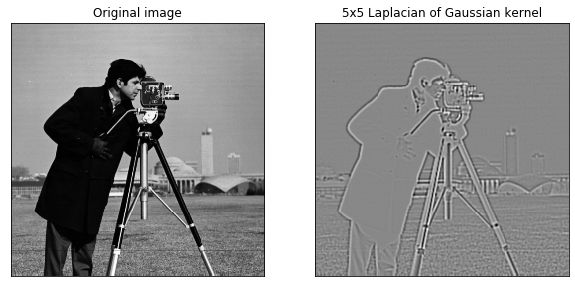

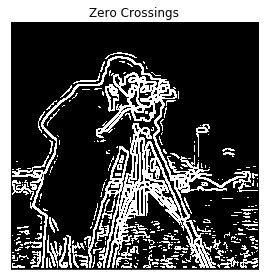

In [194]:
#4.1
#Laplacian of Gaussian
image_path = "cameraman.png" 
img = cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)
# apply  Laplacian filter to the intensity channel
I_lap = cv2.Laplacian(img, cv2.CV_32F, ksize=5)

plt.figure(figsize=(10, 10))
plt.subplot(121), plt.imshow(img, cmap="gray")
plt.title("Original image"), plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(I_lap, cmap="gray")
plt.title("5x5 Laplacian of Gaussian kernel"), plt.xticks([]), plt.yticks([])

#4.2
filtered_img = cv2.GaussianBlur(img, (5,5), 2)

img_laplacian = cv2.Laplacian(filtered_img, cv2.CV_32F, ksize=5)
n, m = img_laplacian.shape
max_pixel = np.amax(img_laplacian)
thresh = 0.15*max_pixel

output = np.zeros(shape = (n, m))
for i in range(1, n - 1):
    for j in range(1, m - 1):
        patch = img_laplacian[i-1:i+2,j-1:j+2]
        pixel = img_laplacian[i, j]
        max_pixel = patch.max()
        min_pixel = patch.min()
        
        if pixel > 0:
            zero_cross = True if min_pixel < 0 else False
        elif pixel <0: 
            zero_cross = True if max_pixel > 0 else False
        elif pixel==0 :
            zero_cross = True
            
        if zero_cross and (max_pixel - min_pixel) > thresh:
            output[i, j] = 255
        else:
            output[i, j] = 0
            

plt.figure(figsize=(10, 10))
plt.subplot(221), plt.imshow(output, cmap="gray")
plt.title("Zero Crossings"), plt.xticks([]), plt.yticks([])
plt.show()



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


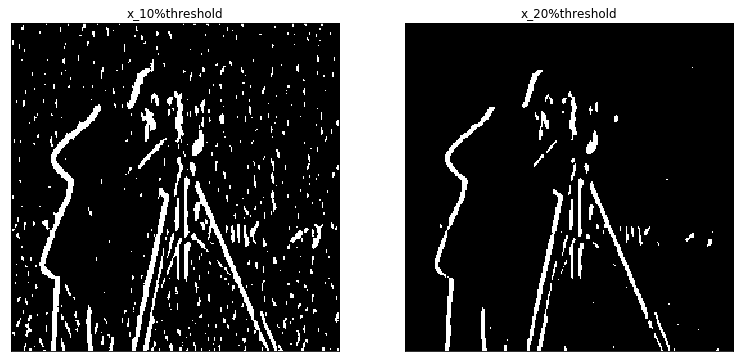

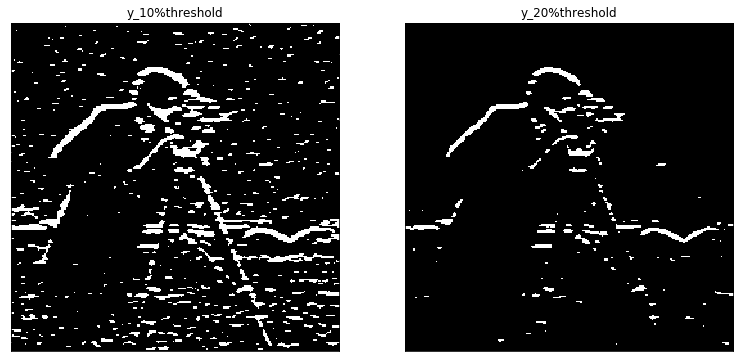

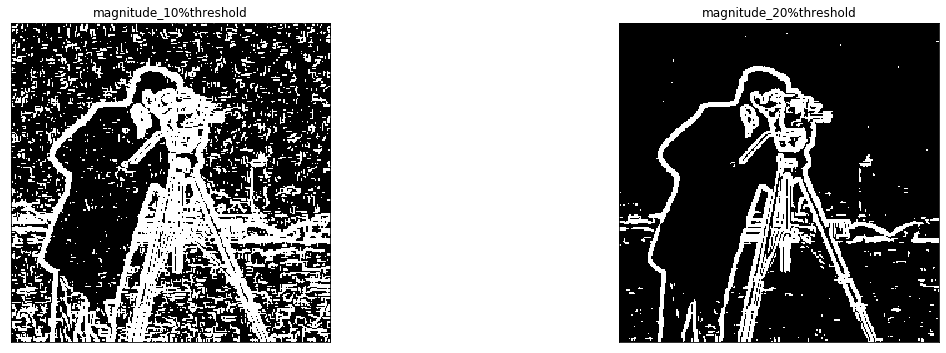

In [196]:
#5.1
#Derivative of Gaussian 
image_path = "gaussian_cameraman.png" 
img = cv2.imread(image_path)

temp=cv2.getGaussianKernel(7,-1)
Gauss=np.outer(temp,temp.transpose())

DoG_x = cv2.Sobel(Gauss, cv2.CV_64F, 1, 0, ksize=3)
DoG_y = cv2.Sobel(Gauss, cv2.CV_64F, 0, 1, ksize=3)

DoG_kernel_x=cv2.filter2D(img, cv2.CV_64F, DoG_x)
DoG_kernel_y=cv2.filter2D(img,  cv2.CV_64F, DoG_y)
DoG_kernel_m2=cv2.magnitude(DoG_kernel_x,DoG_kernel_y)

max_pixel = np.amax(DoG_kernel_m2)
small_thresh = 0.1*max_pixel
big_thresh = 0.2*max_pixel


ret, img_thresh_x_small = cv2.threshold(DoG_kernel_x, small_thresh, max_pixel, cv2.THRESH_BINARY)
ret, img_thresh_x_big = cv2.threshold(DoG_kernel_x, big_thresh, max_pixel, cv2.THRESH_BINARY)
plt.figure(figsize=(20, 20))
plt.subplot(131), plt.imshow(img_thresh_x_small, cmap="gray")
plt.title("x_10%threshold"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(img_thresh_x_big, cmap="gray")
plt.title("x_20%threshold"), plt.xticks([]), plt.yticks([])


ret, img_thresh_y_small = cv2.threshold(DoG_kernel_y, small_thresh, max_pixel, cv2.THRESH_BINARY)
ret, img_thresh_y_big = cv2.threshold(DoG_kernel_y, big_thresh, max_pixel, cv2.THRESH_BINARY)
plt.figure(figsize=(20, 20))
plt.subplot(231), plt.imshow(img_thresh_y_small, cmap="gray")
plt.title("y_10%threshold"), plt.xticks([]), plt.yticks([])
plt.subplot(232), plt.imshow(img_thresh_y_big, cmap="gray")
plt.title("y_20%threshold"), plt.xticks([]), plt.yticks([])


ret, img_thresh_m_small = cv2.threshold(DoG_kernel_m2, small_thresh, max_pixel, cv2.THRESH_BINARY)
ret, img_thresh_m_big = cv2.threshold(DoG_kernel_m2, big_thresh, max_pixel, cv2.THRESH_BINARY)
plt.figure(figsize=(20, 20))
plt.subplot(321), plt.imshow(img_thresh_m_small, cmap="gray")
plt.title("magnitude_10%threshold"), plt.xticks([]), plt.yticks([])
plt.subplot(322), plt.imshow(img_thresh_m_big, cmap="gray")
plt.title("magnitude_20%threshold"), plt.xticks([]), plt.yticks([])
plt.show()



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


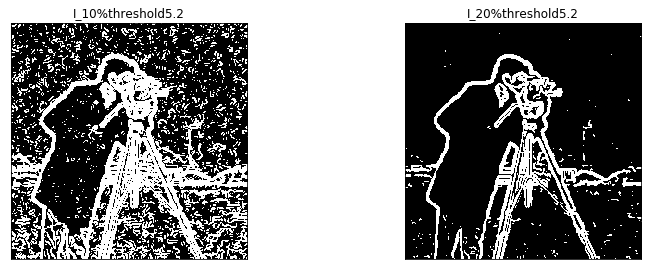

In [198]:
#5.2

image_path = "gaussian_cameraman.png" 
img = cv2.imread(image_path)
#denoise with 5x5 gauss kernel
temp=cv2.getGaussianKernel(5,-1)
Gauss=np.outer(temp,temp.transpose())
denoise_img = cv2.filter2D(img, -1, Gauss)


# apply 3x3 Sobel filters to the intensity channel
I_x = cv2.Sobel(denoise_img, cv2.CV_64F, 1, 0, ksize=3)
I_y = cv2.Sobel(denoise_img, cv2.CV_64F, 0, 1, ksize=3)
I_m = cv2.magnitude(I_x, I_y)

#set the threshold
max_pixel = np.amax(I_m)
small_thresh = 0.1*max_pixel
big_thresh = 0.2*max_pixel
ret, img_thresh_small = cv2.threshold(I_m, small_thresh, max_pixel, cv2.THRESH_BINARY)
ret, img_thresh_big = cv2.threshold(I_m, big_thresh, max_pixel, cv2.THRESH_BINARY)

plt.figure(figsize=(20, 20))
plt.subplot(432), plt.imshow(img_thresh_small, cmap="gray")
plt.title("I_10%threshold5.2"), plt.xticks([]), plt.yticks([])
plt.subplot(433), plt.imshow(img_thresh_big, cmap="gray")
plt.title("I_20%threshold5.2"), plt.xticks([]), plt.yticks([])
plt.show()












Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


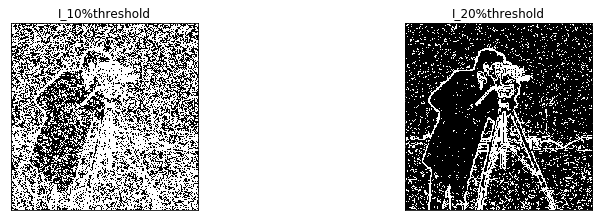

In [199]:
#5.3
image_path = "gaussian_cameraman.png" 
img = cv2.imread(image_path)
I_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
I_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
I_m = cv2.magnitude(I_x, I_y)

#set the threshold
max_pixel = np.amax(I_m)
small_thresh = 0.1*max_pixel
big_thresh = 0.2*max_pixel

ret, img_thresh_small = cv2.threshold(I_m, small_thresh, max_pixel, cv2.THRESH_BINARY)
ret, img_thresh_big = cv2.threshold(I_m, big_thresh, max_pixel, cv2.THRESH_BINARY)


# display images
plt.figure(figsize=(20, 20))
plt.subplot(532), plt.imshow(img_thresh_small, cmap="gray")
plt.title("I_10%threshold"), plt.xticks([]), plt.yticks([])
plt.subplot(533), plt.imshow(img_thresh_big, cmap="gray")
plt.title("I_20%threshold"), plt.xticks([]), plt.yticks([])
plt.show()

5.4 State your observations about the dierences/similarities in the above
three results.

Similarities:

Image with a higher threshold value has a better edege detection performance. 

Differences:

By adding a 5x5 Gaussian kernel, noises are greatly reduced. The output image becomes more clear. 

By applying a Sobel kernel on the original Gaussian kernel, this gives the best image among the three. More noise are removed, compared with the image denoised by the Gaussian kernel only.  

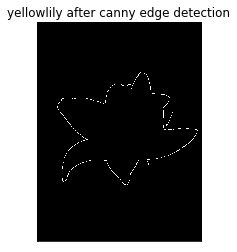

In [200]:
#6.1 
# load image as gray-scaled
image_path = "yellowlily.png" 
img = cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)

# blur image before-hand
img = cv2.GaussianBlur(img, (7, 7), 0)

I_edge = cv2.Canny(img, 100, 400)


plt.figure(figsize=(10, 10))
plt.subplot(232), plt.imshow(I_edge, cmap="gray")
plt.title("yellowlily after canny edge detection"), plt.xticks([]), plt.yticks([])
plt.show()

6.2 Comment on how changing values of kernel size lower and upper thresholds affect the overall edge detection.

As I decrease the kernel size, the canny edge detector can provide more information but confuse the true edges from the wrong ones. As I increase the kernel size, less information is detected. 

For the high threshold H, if I increase the value of H, the frame of image will be better detected. However, if H is too high, nothing will be detected. 

For the low threshold L, if I increase the value of L, the disconnected edge parts will be better filled. However, L cannot be too high. In that case, it will cause mistaken filling of disconnected edges. 

Thus, L and H should be chosen appropriately. 